In [7]:
import pandas as pd

# df = pd.read_csv('./output_table_page_1.csv').drop(['Unnamed: 0'], axis=1)
# df.to_csv('./output_table_page_1.csv', index=False)

df_ls = []
for i in range(1,17):
    df = pd.read_csv(f'./data/output_table_page_{i}.csv')
    df.columns = ['Sl.','District','Site','pH','EC','TDS','CO3','HCO3','Cl','NO3','SO4','F','Alk','Ca','Mg','TH','Na','K','SAR']
    df_ls.append(df)

df = pd.concat(df_ls).reset_index(drop=True)

In [8]:
df

,Sl.,District,Site,pH,EC,TDS,CO3,HCO3,Cl,NO3,SO4,F,Alk,Ca,Mg,TH,Na,K,SAR
0,1,Ahmedabad,Dalod,8.20,16640,11149.00,0.0,1257.0,5176.0,26.00,822.0,1.00,1030.82,152.0,260.0,1451.0,3535.0,45.00,40.00
1,2,Ahmedabad,Endla,7.35,715,479.00,0.0,354.0,50.0,0.23,18.0,0.46,290.00,56.0,34.0,280.0,47.0,11.00,1.20
2,3,Ahmedabad,Viramgam,8.08,2810,1883.00,0.0,329.0,596.0,4.90,230.0,0.32,270.00,16.0,19.0,120.0,541.0,4.40,21.50
3,4,Ahmedabad,Kumar Khan,7.34,6118,4099.00,0.0,1403.0,1120.0,21.00,397.0,3.50,1150.92,148.0,61.0,620.0,1100.0,63.00,19.20
4,5,Ahmedabad,Kundal,7.70,1243,833.00,0.0,354.0,184.0,2.20,64.0,0.73,290.00,44.0,24.0,210.0,178.0,1.70,5.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,597,Valsad,Bhilad,6.99,356,238.52,0.0,171.0,28.0,3.00,15.0,0.15,140.00,40.0,15.0,160.0,16.0,1.36,0.55
567,598,Valsad,Tumb,7.97,668,447.56,0.0,281.0,71.0,4.00,4.0,0.22,230.00,56.0,24.0,240.0,45.0,8.10,1.26
568,599,Valsad,Umargaon,8.03,641,429.47,0.0,281.0,57.0,12.00,50.0,0.34,230.00,56.0,22.0,230.0,59.0,0.54,1.68
569,600,Valsad,Kanadu,7.63,943,631.81,0.0,366.0,114.0,24.00,58.0,0.28,300.00,80.0,49.0,400.0,57.0,0.24,1.25


<Axes: >

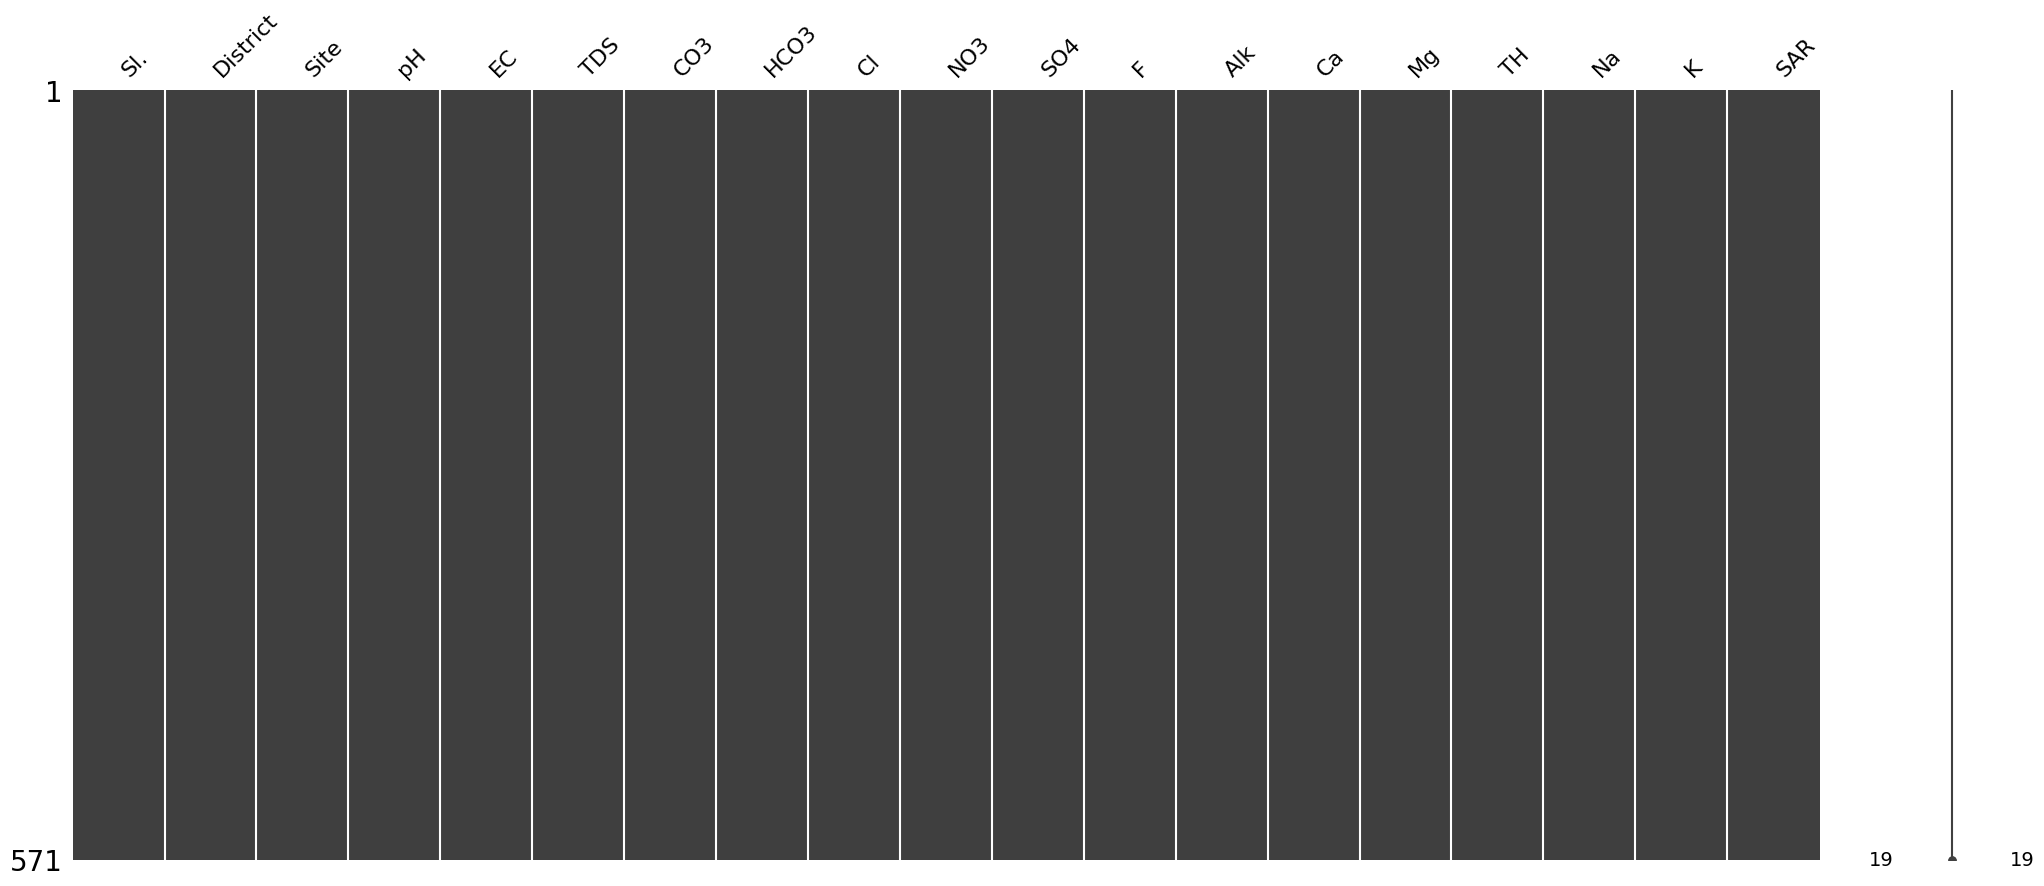

In [9]:
import missingno as mno

mno.matrix(df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_palette('bright')

<Axes: >

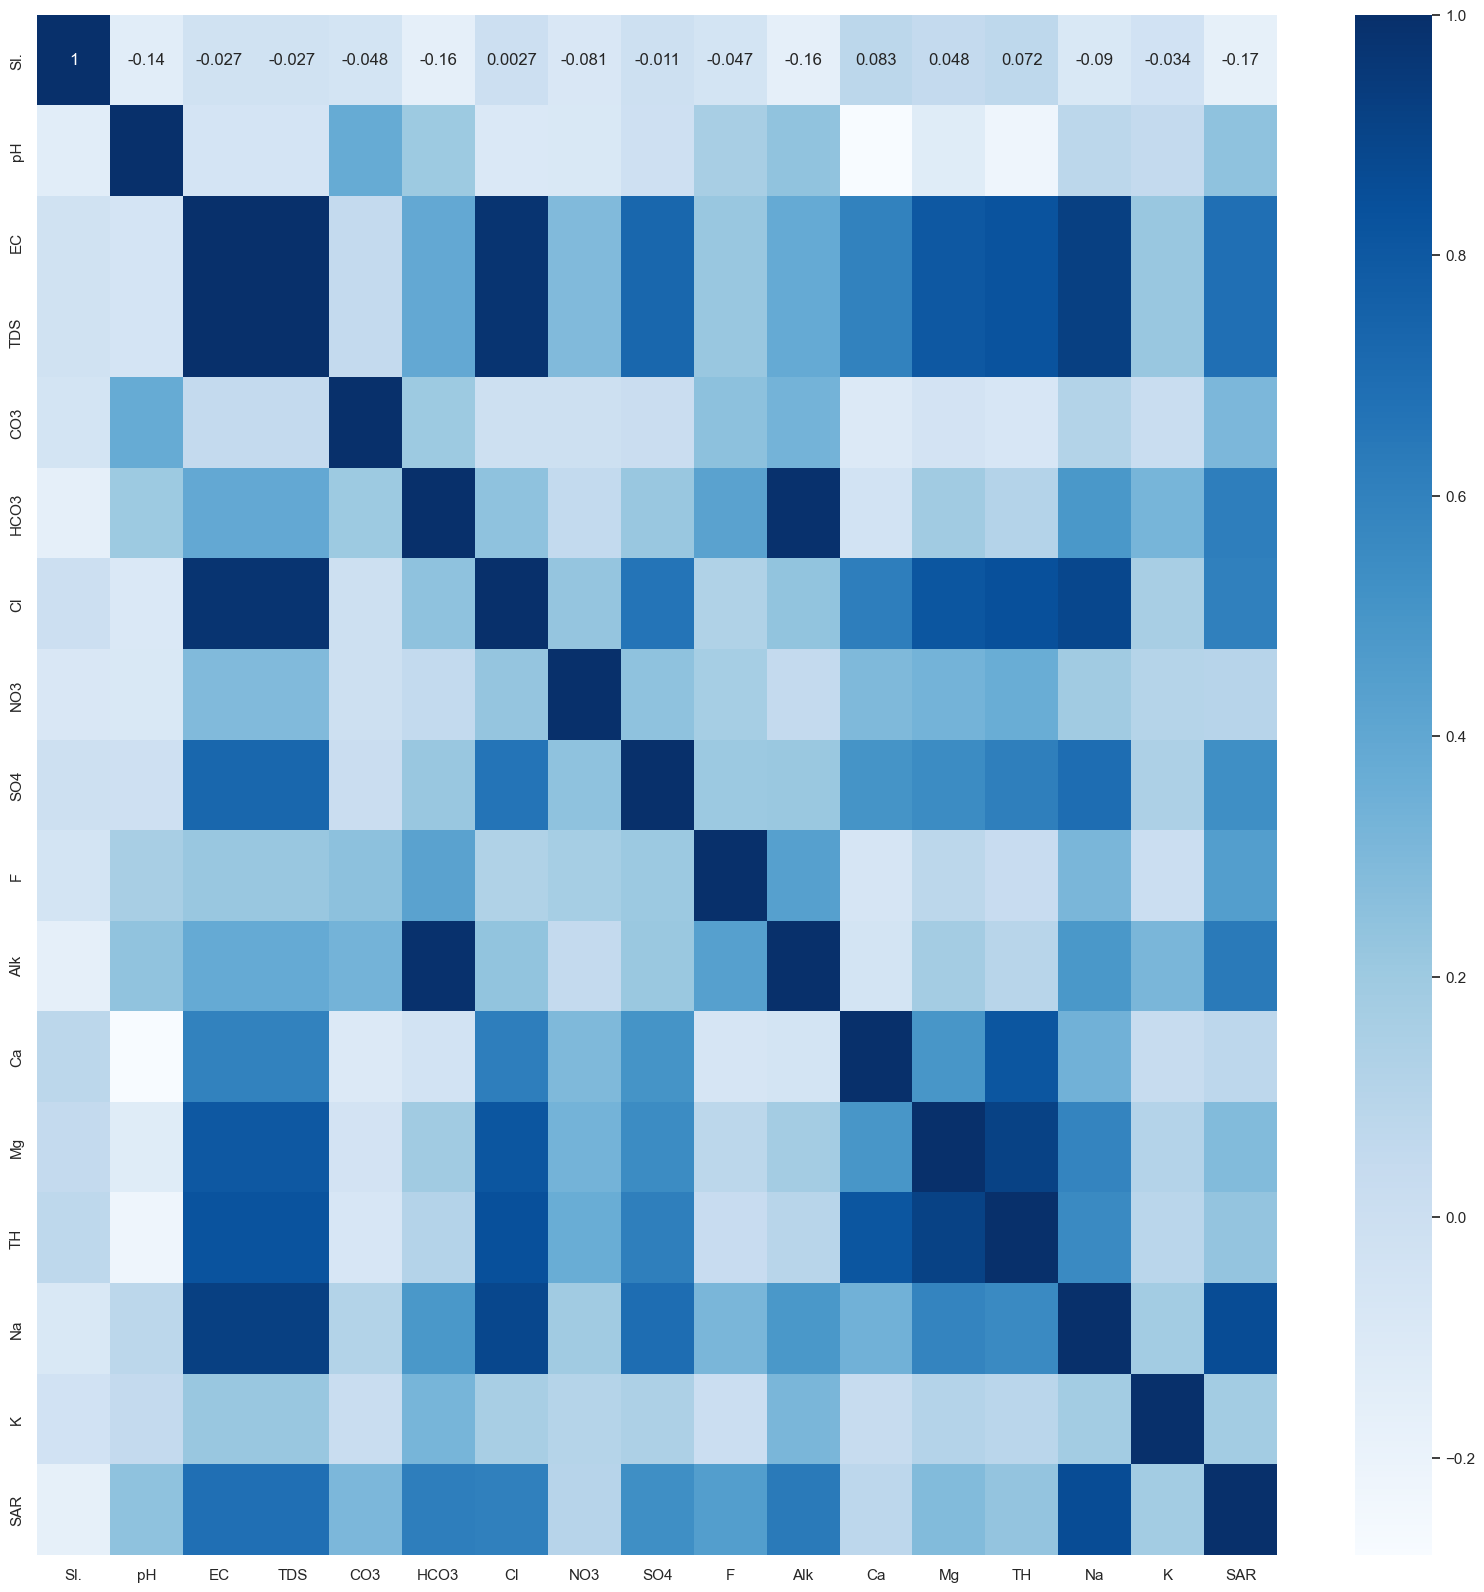

In [ ]:
plt.figure(figsize=(20,20))
num_cols = df.select_dtypes(include='number')
sns.heatmap(num_cols.corr(), annot=True, cmap='Blues')

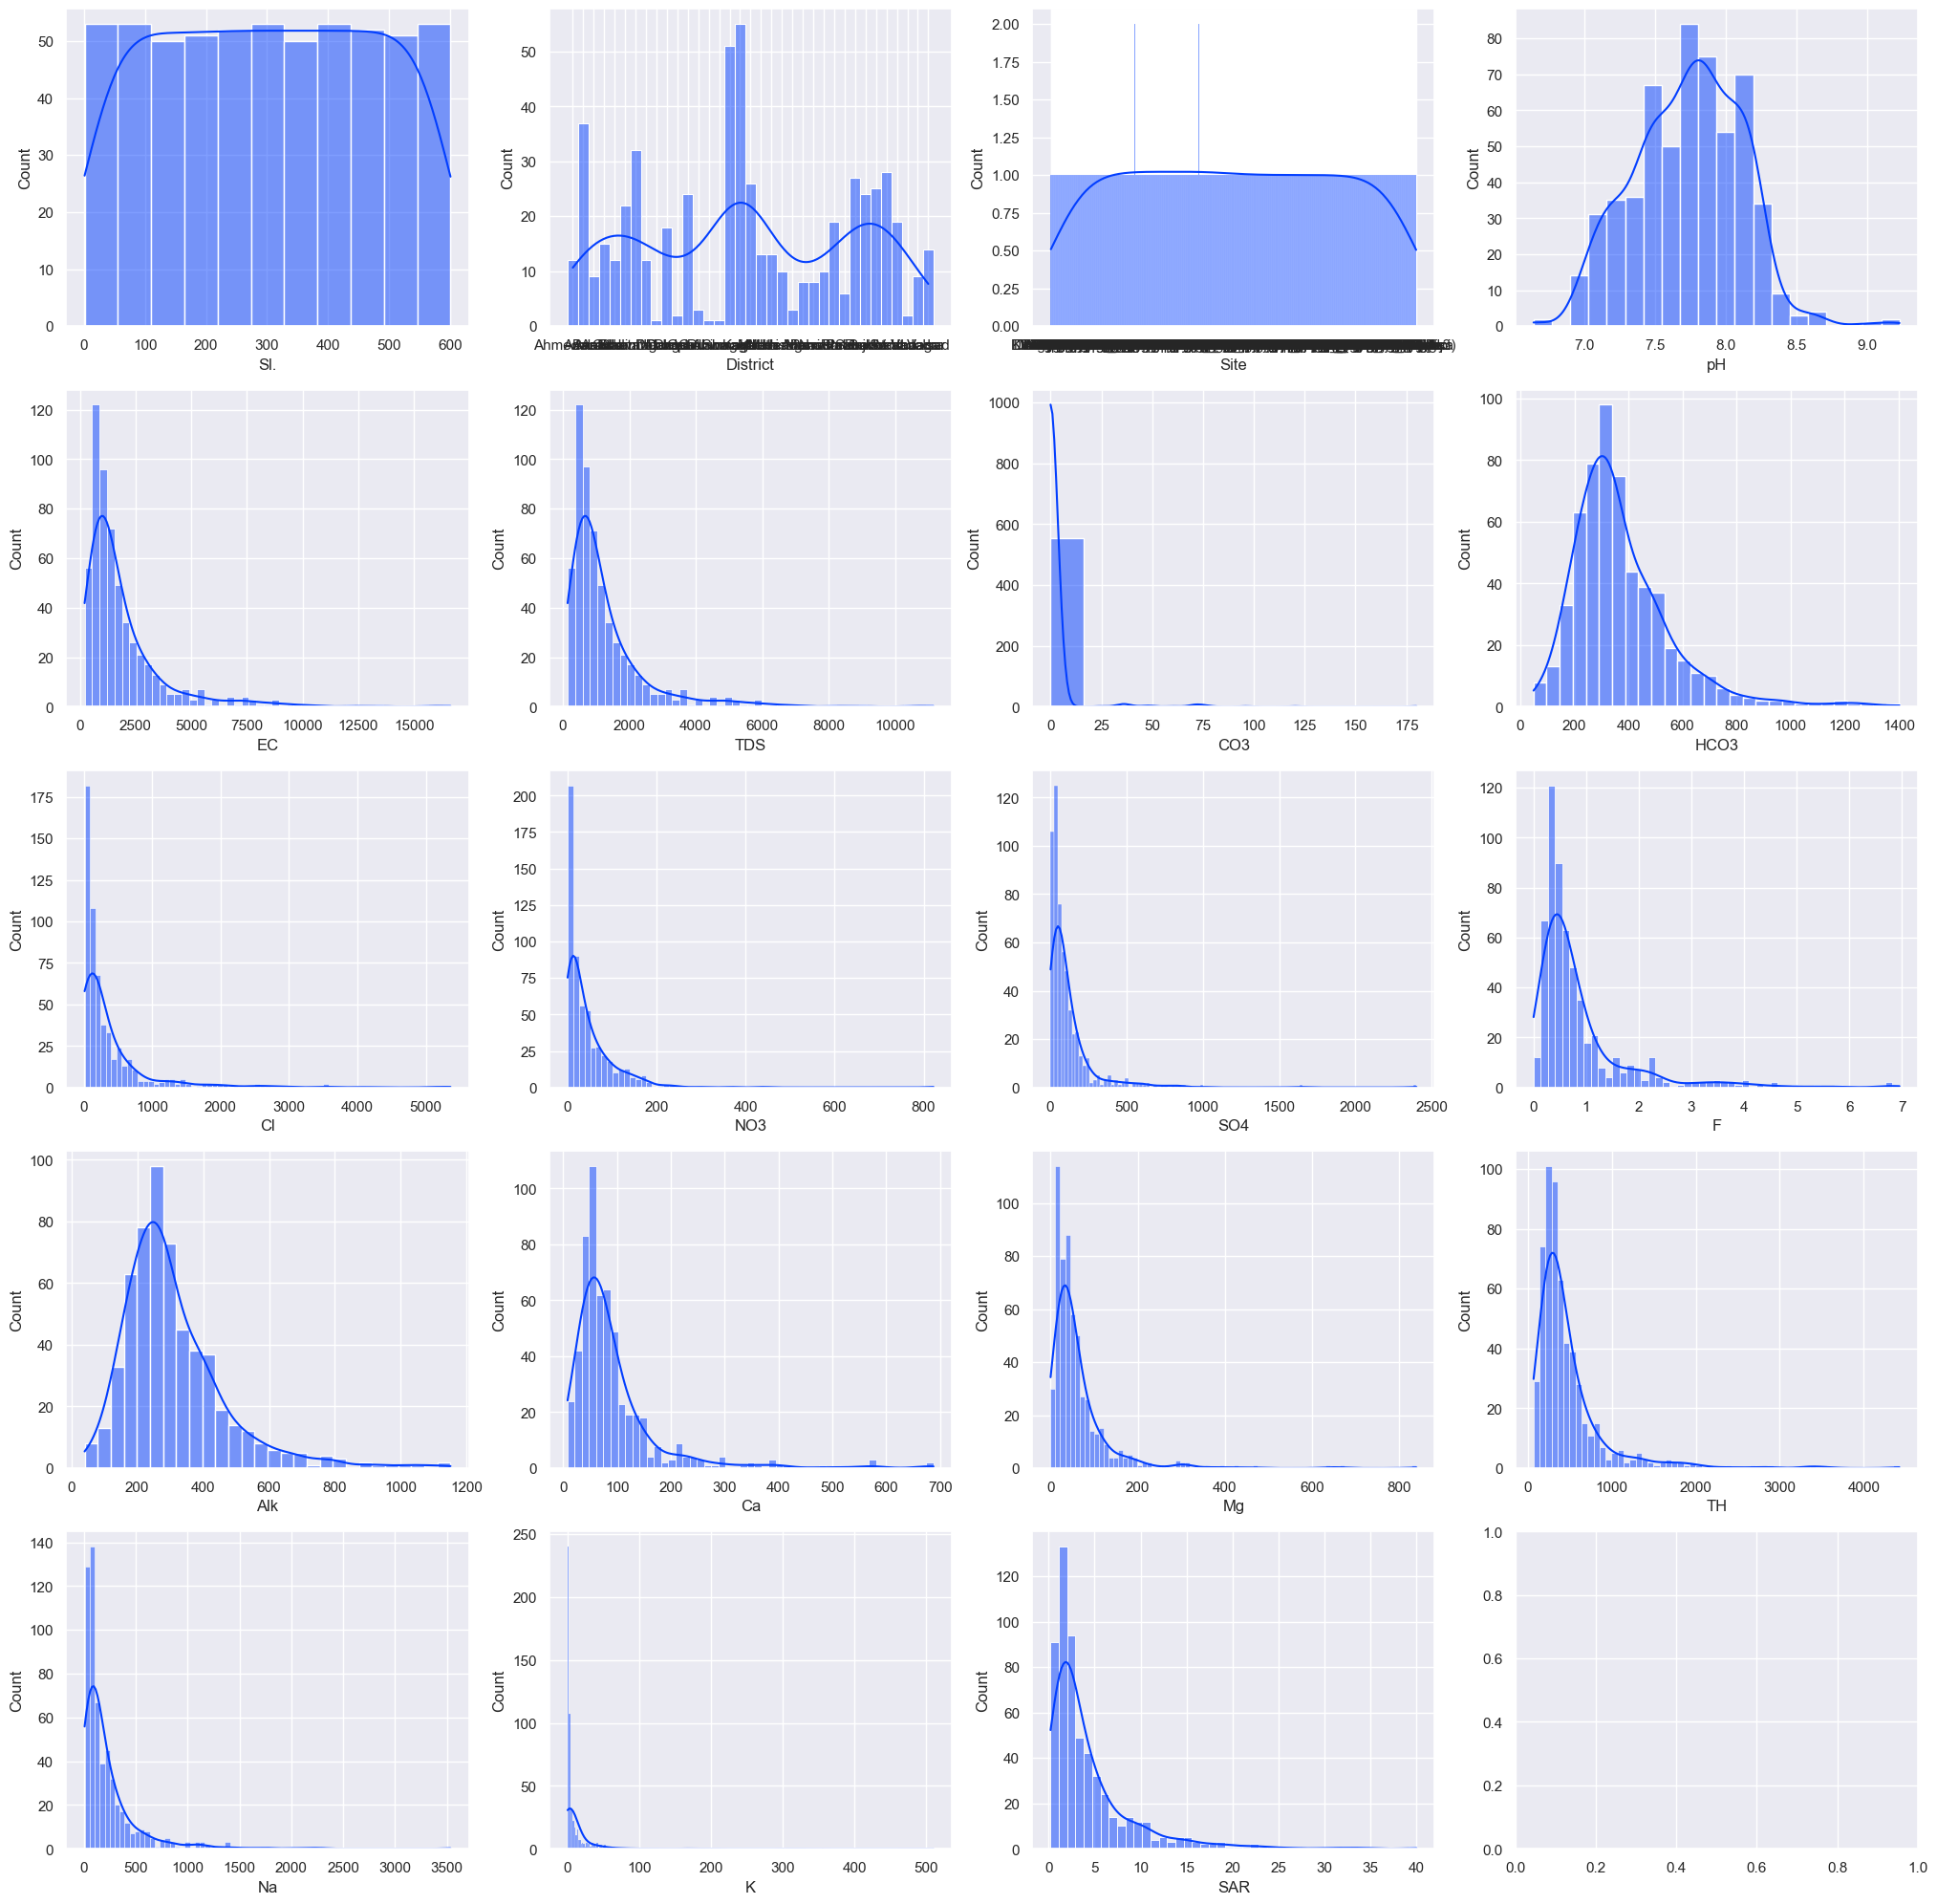

In [ ]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(5, 4, figsize=(25,25))
for col, ax in zip(df.columns, axes.flatten()):
    sns.histplot(df[col], ax=ax, kde=True)

## 1. Weighted Arithmetic Water Quality Index Method

I will be using "Weighted Arithmetic Water Quality Index Method" to calculate WQI of each water sample. The formula to calculate WQI is -

WQI = ∑ qi × wi / ∑ wi

Here wi - Unit weight of ith parameter

qi - Quality estimate scale of each parameter, it is calculated with the formula - 

qi = 100 × ( Vi − VIdeal / Si − VIdeal )

Here Vi - Measured value of ith parameter

Videal - Ideal value of ith parameter in pure water

Si - Standard value recommended for ith parameter

wi is calculated by the formula -

wi = K / Si

Here K is proportionality constant which is -

K = 1 / ∑ Si

In [ ]:
df.columns[3:]

Index(['pH', 'EC', 'TDS', 'CO3', 'HCO3', 'Cl', 'NO3', 'SO4', 'F', 'Alk', 'Ca',
       'Mg', 'TH', 'Na', 'K', 'SAR'],
      dtype='object')

SAR, K, Na, HCO3, CO3

In [ ]:
wqi_df = pd.DataFrame({
    'features':        ['pH','EC','TDS','Alk','TH', 'F','Cl','NO3','SO4','Ca','Mg'],
    'standard_values': [8.5 , 300, 1000,  120, 300, 1.5, 250,  45,  250,  75,  30],
    'ideal_values':    [    7,  0,    0,    0,   0,   0,   0,   0,    0,   0,   0],
})

In [ ]:
k = 1 / (wqi_df['standard_values'].sum())
wqi_df['unit_weights'] = k/wqi_df['standard_values']
wqi_df

,features,standard_values,ideal_values,unit_weights
0,pH,8.5,7,4.943154e-05
1,EC,300.0,0,1.400560e-06
2,TDS,1000.0,0,4.201681e-07
3,Alk,120.0,0,3.501401e-06
4,TH,300.0,0,1.400560e-06
5,F,1.5,0,2.801120e-04
6,Cl,250.0,0,1.680672e-06
7,NO3,45.0,0,9.337068e-06
8,SO4,250.0,0,1.680672e-06
9,Ca,75.0,0,5.602241e-06


In [ ]:
wqi_df['unit_weights'].sum()

0.00036857252705003573

In [ ]:
import numpy as np

qe = pd.DataFrame()
qi_wi = []

for col in wqi_df['features']:
    # print('col = ', col)
    v_ideal = wqi_df[wqi_df['features'] == col]['ideal_values'].values[0]
    s_value = wqi_df[wqi_df['features'] == col]['standard_values'].values[0]
    # print(v_ideal, s_value)
    qe[col] = 100 * (df[col] - v_ideal) / (s_value - v_ideal)

for row in qe.iterrows():
    qi_wi.append((np.array(row[1])*wqi_df['unit_weights']).sum())

In [ ]:
qe['qi_wi'] = qi_wi
qe

,pH,EC,TDS,Alk,TH,F,Cl,NO3,SO4,Ca,Mg,qi_wi
0,80.000000,5546.666667,1114.900,859.016667,483.666667,66.666667,2070.4,57.777778,328.8,202.666667,866.666667,0.052396
1,23.333333,238.333333,47.900,241.666667,93.333333,30.666667,20.0,0.511111,7.2,74.666667,113.333333,0.013130
2,72.000000,936.666667,188.300,225.000000,40.000000,21.333333,238.4,10.888889,92.0,21.333333,63.333333,0.013433
3,22.666667,2039.333333,409.900,959.100000,206.666667,233.333333,448.0,46.666667,158.8,197.333333,203.333333,0.078565
4,46.666667,414.333333,83.300,241.666667,70.000000,48.666667,73.6,4.888889,25.6,58.666667,80.000000,0.019160
...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.666667,118.666667,23.852,116.666667,53.333333,10.000000,11.2,6.666667,6.0,53.333333,50.000000,0.004518
567,64.666667,222.666667,44.756,191.666667,80.000000,14.666667,28.4,8.888889,1.6,74.666667,80.000000,0.010091
568,68.666667,213.666667,42.947,191.666667,76.666667,22.666667,22.8,26.666667,20.0,74.666667,73.333333,0.012606
569,42.000000,314.333333,63.181,250.000000,133.333333,18.666667,45.6,53.333333,23.2,106.666667,163.333333,0.012333


In [ ]:
qe['WQI'] = qe['qi_wi'] / wqi_df['unit_weights'].sum()

In [ ]:
qe

,pH,EC,TDS,Alk,TH,F,Cl,NO3,SO4,Ca,Mg,qi_wi,WQI
0,80.000000,5546.666667,1114.900,859.016667,483.666667,66.666667,2070.4,57.777778,328.8,202.666667,866.666667,0.052396,142.159351
1,23.333333,238.333333,47.900,241.666667,93.333333,30.666667,20.0,0.511111,7.2,74.666667,113.333333,0.013130,35.625040
2,72.000000,936.666667,188.300,225.000000,40.000000,21.333333,238.4,10.888889,92.0,21.333333,63.333333,0.013433,36.446308
3,22.666667,2039.333333,409.900,959.100000,206.666667,233.333333,448.0,46.666667,158.8,197.333333,203.333333,0.078565,213.159892
4,46.666667,414.333333,83.300,241.666667,70.000000,48.666667,73.6,4.888889,25.6,58.666667,80.000000,0.019160,51.984119
...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.666667,118.666667,23.852,116.666667,53.333333,10.000000,11.2,6.666667,6.0,53.333333,50.000000,0.004518,12.257566
567,64.666667,222.666667,44.756,191.666667,80.000000,14.666667,28.4,8.888889,1.6,74.666667,80.000000,0.010091,27.378214
568,68.666667,213.666667,42.947,191.666667,76.666667,22.666667,22.8,26.666667,20.0,74.666667,73.333333,0.012606,34.201086
569,42.000000,314.333333,63.181,250.000000,133.333333,18.666667,45.6,53.333333,23.2,106.666667,163.333333,0.012333,33.460239


In [ ]:
qe['WQI_CLASSIF'] = qe['WQI'].apply(lambda x: 'Excellent' if x <= 25 else 'Good' if x <= 50 else 'Poor' if x <= 75 else 'Very Poor' if x <= 100 else 'Unsuitable')
qe

,pH,EC,TDS,Alk,TH,F,Cl,NO3,SO4,Ca,Mg,qi_wi,WQI,WQI_CLASSIF
0,80.000000,5546.666667,1114.900,859.016667,483.666667,66.666667,2070.4,57.777778,328.8,202.666667,866.666667,0.052396,142.159351,Unsuitable
1,23.333333,238.333333,47.900,241.666667,93.333333,30.666667,20.0,0.511111,7.2,74.666667,113.333333,0.013130,35.625040,Good
2,72.000000,936.666667,188.300,225.000000,40.000000,21.333333,238.4,10.888889,92.0,21.333333,63.333333,0.013433,36.446308,Good
3,22.666667,2039.333333,409.900,959.100000,206.666667,233.333333,448.0,46.666667,158.8,197.333333,203.333333,0.078565,213.159892,Unsuitable
4,46.666667,414.333333,83.300,241.666667,70.000000,48.666667,73.6,4.888889,25.6,58.666667,80.000000,0.019160,51.984119,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.666667,118.666667,23.852,116.666667,53.333333,10.000000,11.2,6.666667,6.0,53.333333,50.000000,0.004518,12.257566,Excellent
567,64.666667,222.666667,44.756,191.666667,80.000000,14.666667,28.4,8.888889,1.6,74.666667,80.000000,0.010091,27.378214,Good
568,68.666667,213.666667,42.947,191.666667,76.666667,22.666667,22.8,26.666667,20.0,74.666667,73.333333,0.012606,34.201086,Good
569,42.000000,314.333333,63.181,250.000000,133.333333,18.666667,45.6,53.333333,23.2,106.666667,163.333333,0.012333,33.460239,Good


In [ ]:
qe.to_csv('quality_estimate_and_wqi.csv', index=False)

# Prediction

### 1. Regression

In [ ]:
import statsmodels.api as sm

X = qe.drop(['WQI','WQI_CLASSIF','qi_wi'], axis=1)
y = qe['WQI']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WQI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.672e+27
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:41:23   Log-Likelihood:                 14042.
No. Observations:                 571   AIC:                        -2.806e+04
Df Residuals:                     559   BIC:                        -2.801e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.346e-15   7.16e-13     -0.010      0.992   -1.41e-12     1.4e-12
pH             0.1341   9.31e-15   1.44e+13      0.000       0.134       0.134
EC             0.0038   2.71e-12    1.4e+09      0.000       0.004       0.004
TDS            0.0011   1.35e-11   8.45e+07      0.000       0.001       0.001
Alk            0.0095   3.91e-15   2.43e+12      0.000       0.009       0.009
TH             0.0038   5.61e-13   6.77e+09      0.000       0.004       0.004
F              0.7600   3.96e-15   1.92e+14      0.000       0.760       0.760
Cl             0.0046   1.05e-14   4.36e+11      0.000       0.005       0.005
NO3            0.0253   2.14e-15   1.18e+13      0.000       0.025       0.025
SO4            0.0046   6.31e-15   7.22e+11      0.000       0.005       0.005
Ca             0.0152   3.51e-13   4.33e+10      0.000       0.015       0.015
Mg             0.0380   2.31e-13   1.65e+11      0.000       0.038       0.038
==============================================================================
Omnibus:                      388.364   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3950.437
Skew:                          -2.990   Prob(JB):                         0.00
Kurtosis:                      14.414   Cond. No.                     6.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2. Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = qe.drop(['WQI','WQI_CLASSIF','qi_wi'], axis=1)
y = qe['WQI_CLASSIF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.8695652173913043

# Visualizations

In [13]:
data = pd.read_csv('./data/quality_estimate_and_wqi.csv')
data['DISTRICT'] = df['District']
data

,pH,EC,TDS,Alk,TH,F,Cl,NO3,SO4,Ca,Mg,qi_wi,WQI,WQI_CLASSIF,DISTRICT
0,80.000000,5546.666667,1114.900,859.016667,483.666667,66.666667,2070.4,57.777778,328.8,202.666667,866.666667,0.052396,142.159351,Unsuitable,Ahmedabad
1,23.333333,238.333333,47.900,241.666667,93.333333,30.666667,20.0,0.511111,7.2,74.666667,113.333333,0.013130,35.625040,Good,Ahmedabad
2,72.000000,936.666667,188.300,225.000000,40.000000,21.333333,238.4,10.888889,92.0,21.333333,63.333333,0.013433,36.446308,Good,Ahmedabad
3,22.666667,2039.333333,409.900,959.100000,206.666667,233.333333,448.0,46.666667,158.8,197.333333,203.333333,0.078565,213.159892,Unsuitable,Ahmedabad
4,46.666667,414.333333,83.300,241.666667,70.000000,48.666667,73.6,4.888889,25.6,58.666667,80.000000,0.019160,51.984119,Poor,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.666667,118.666667,23.852,116.666667,53.333333,10.000000,11.2,6.666667,6.0,53.333333,50.000000,0.004518,12.257566,Excellent,Valsad
567,64.666667,222.666667,44.756,191.666667,80.000000,14.666667,28.4,8.888889,1.6,74.666667,80.000000,0.010091,27.378214,Good,Valsad
568,68.666667,213.666667,42.947,191.666667,76.666667,22.666667,22.8,26.666667,20.0,74.666667,73.333333,0.012606,34.201086,Good,Valsad
569,42.000000,314.333333,63.181,250.000000,133.333333,18.666667,45.6,53.333333,23.2,106.666667,163.333333,0.012333,33.460239,Good,Valsad


In [30]:
ddf = pd.DataFrame(data.groupby('DISTRICT')['WQI_CLASSIF'].value_counts())
ddf

count
DISTRICT  WQI_CLASSIF       
Ahmedabad Unsuitable       5
          Poor             4
          Good             3
Amreli    Good            23
          Poor             5
...                      ...
Vadodra   Very Poor        1
Valsad    Good            10
          Excellent        2
          Poor             1
          Unsuitable       1

[118 rows x 1 columns]

In [34]:
len(ddf.index.get_level_values(0).unique())

35

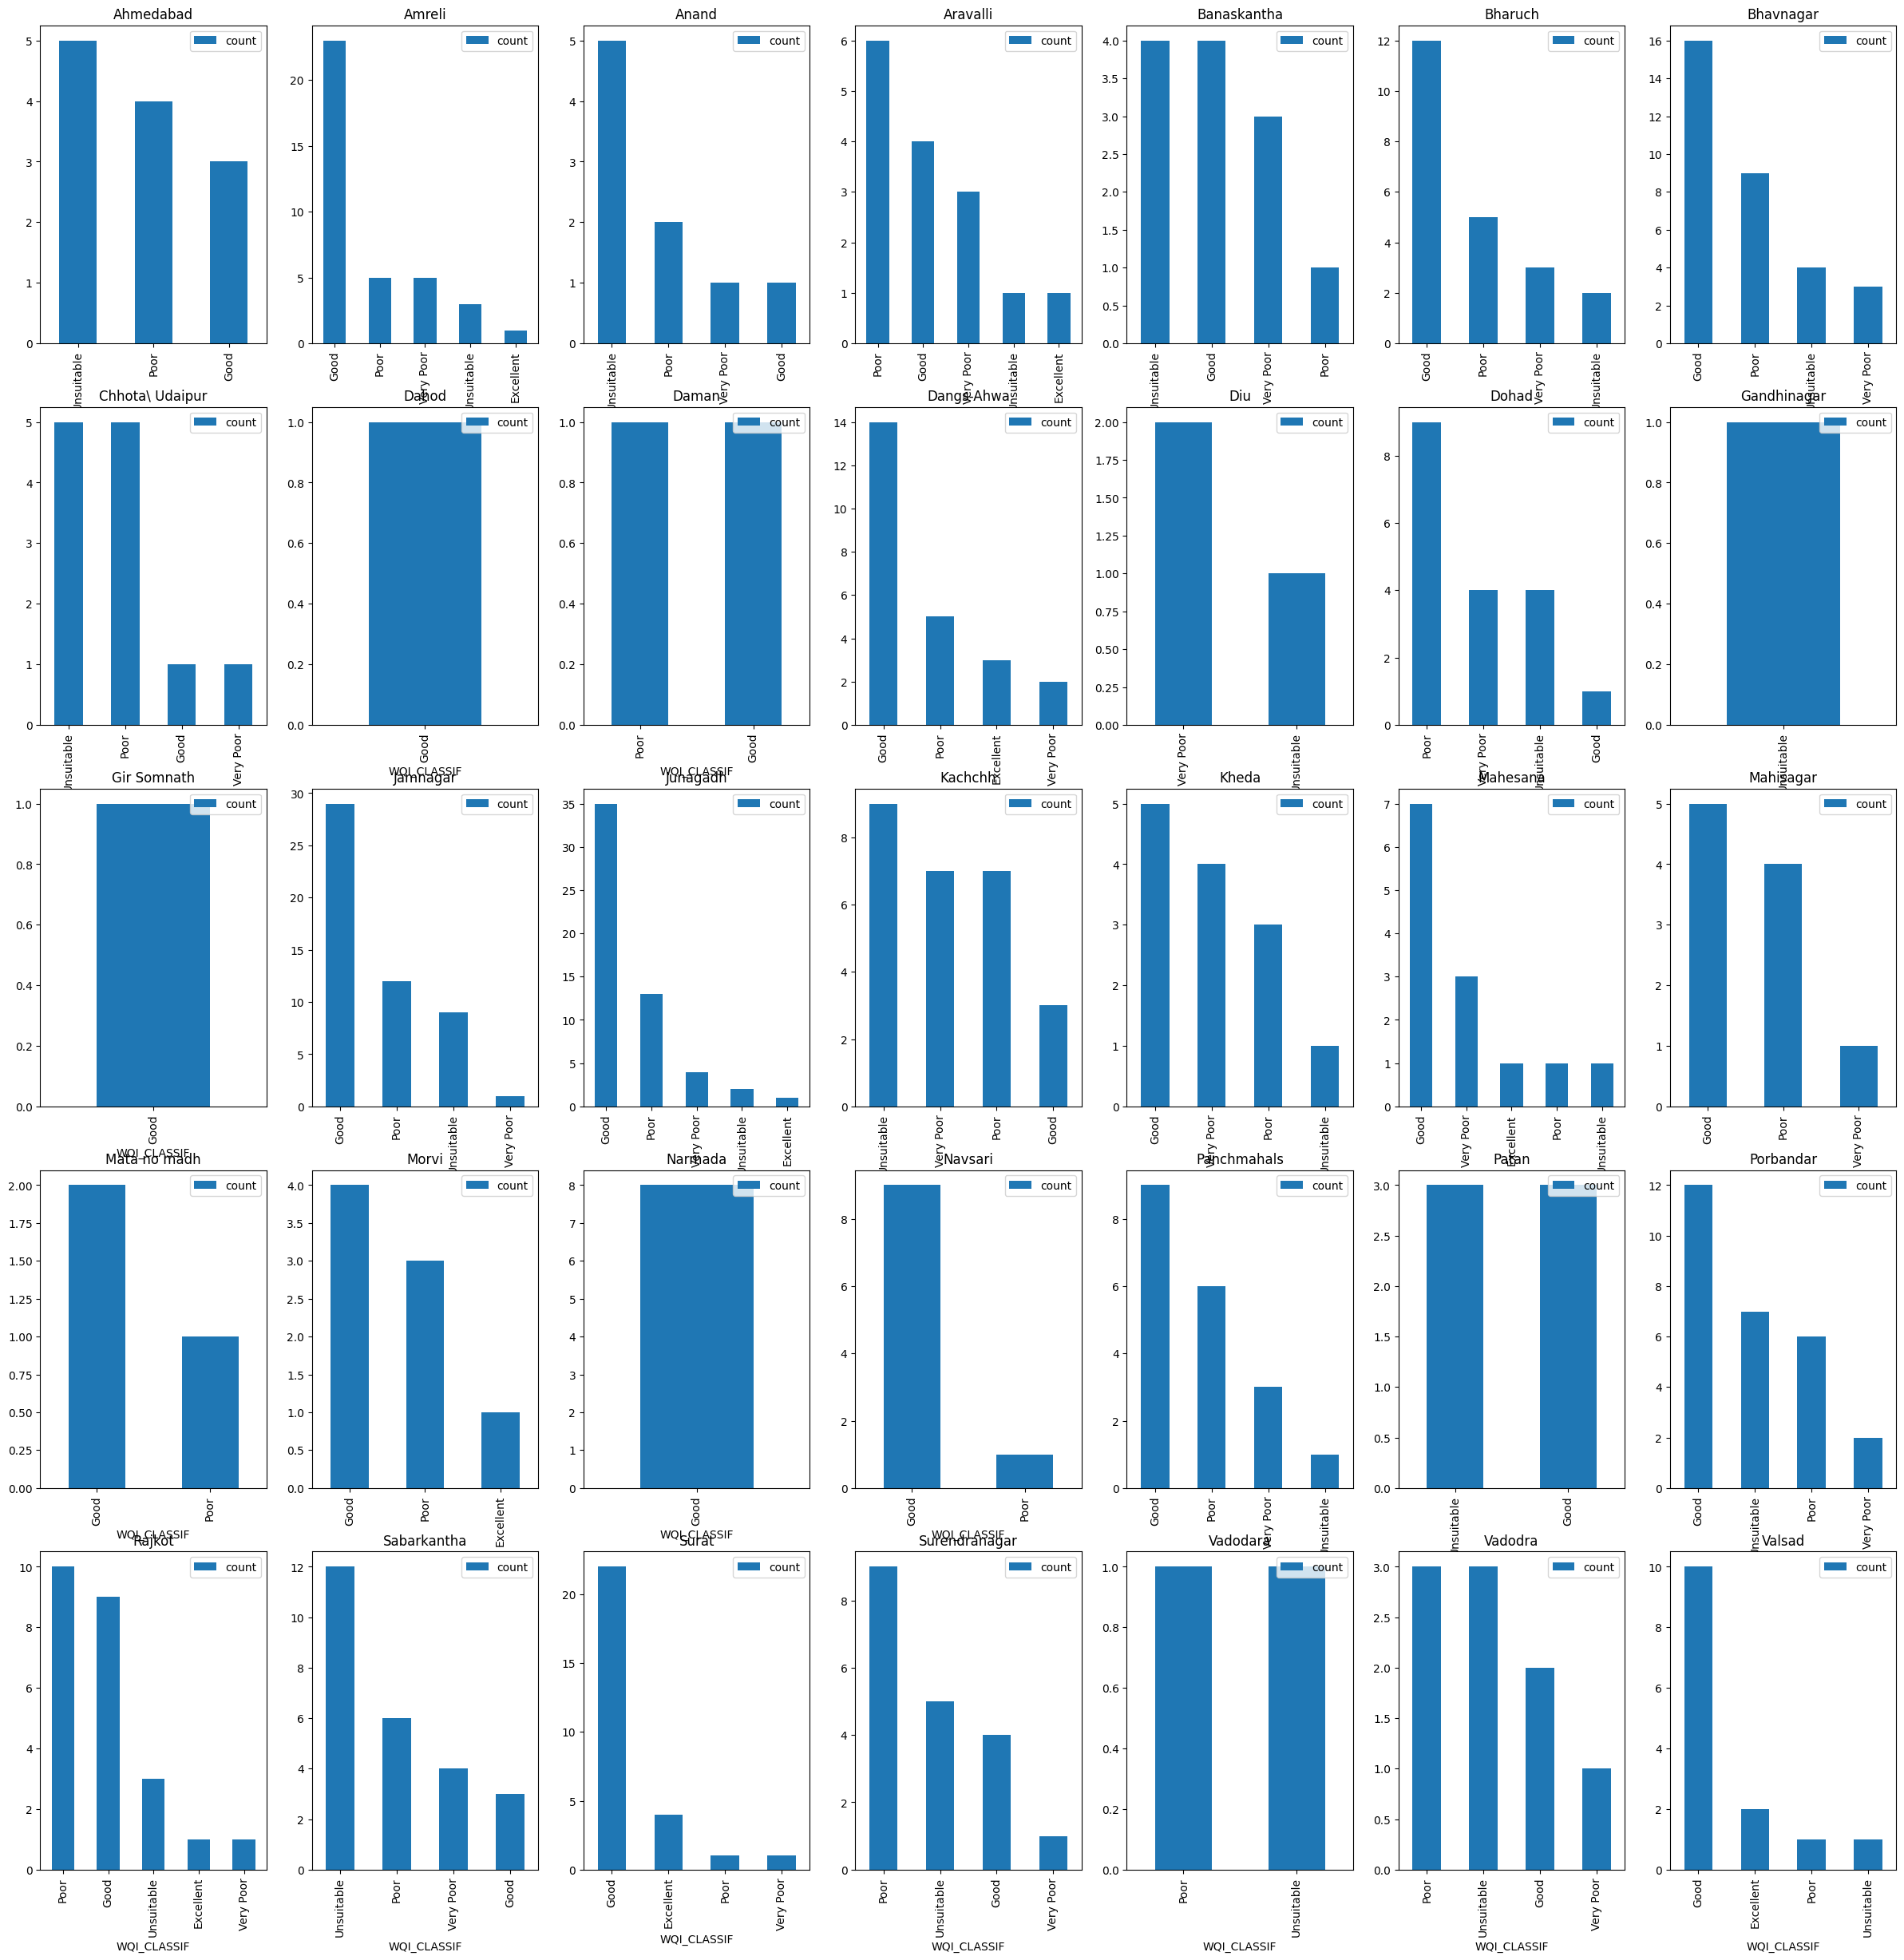

In [40]:
fig, axes = plt.subplots(5, 7, figsize=(30,30))
# plot bar chart for each district in ddf dataframe for their WQI_CLASSIF
for district, ax in zip(ddf.index.get_level_values(0).unique(), axes.flatten()):
    ddf.loc[district].plot(kind='bar', ax=ax, title=district)
    # sns.countplot(data=ddf.loc[district], ax=ax)

In [53]:
ddf1 = pd.DataFrame(data.groupby('DISTRICT')['WQI'].mean()).sort_values(by='WQI', ascending=True)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Gir Somnath'),
  Text(1, 0, 'Navsari'),
  Text(2, 0, 'Surat'),
  Text(3, 0, 'Narmada'),
  Text(4, 0, 'Dangs-Ahwa'),
  Text(5, 0, 'Mata no madh'),
  Text(6, 0, 'Morvi'),
  Text(7, 0, 'Daman'),
  Text(8, 0, 'Dahod'),
  Text(9, 0, 'Junagadh'),
  Text(10, 0, 'Valsad'),
  Text(11, 0, 'Mahisagar'),
  Text(12, 0, 'Amreli'),
  Text(13, 0, 'Panchmahals'),
  Text(14, 0, 'Aravalli'),
  Text(15, 0, 'Mahesana'),
  Text(16, 0, 'Bharuch'),
  Text(17, 0, 'Bhavnagar'),
  Text(18, 0, 'Rajkot'),
  Text(19, 0, 'Jamnagar'),
  Text(20, 0, 'Porbandar'),
  Text(21, 0, 'Kheda'),
  Text(22, 0, 'Vadodara'),
  Text(23, 0, 'Surendranagar'),
  Text(24, 0, 'Vadodra'),
  Text(25, 0, 'Banaskantha'),
  Text(26, 0, 'Diu'),
  Text(27, 0, 'Sabarkantha'),
  Text(28, 0, 'Dohad'),
  Text(29, 0, 'Gandhinagar'),
  Text(30, 0, 'Chhota\\ Udaipur'),
  T

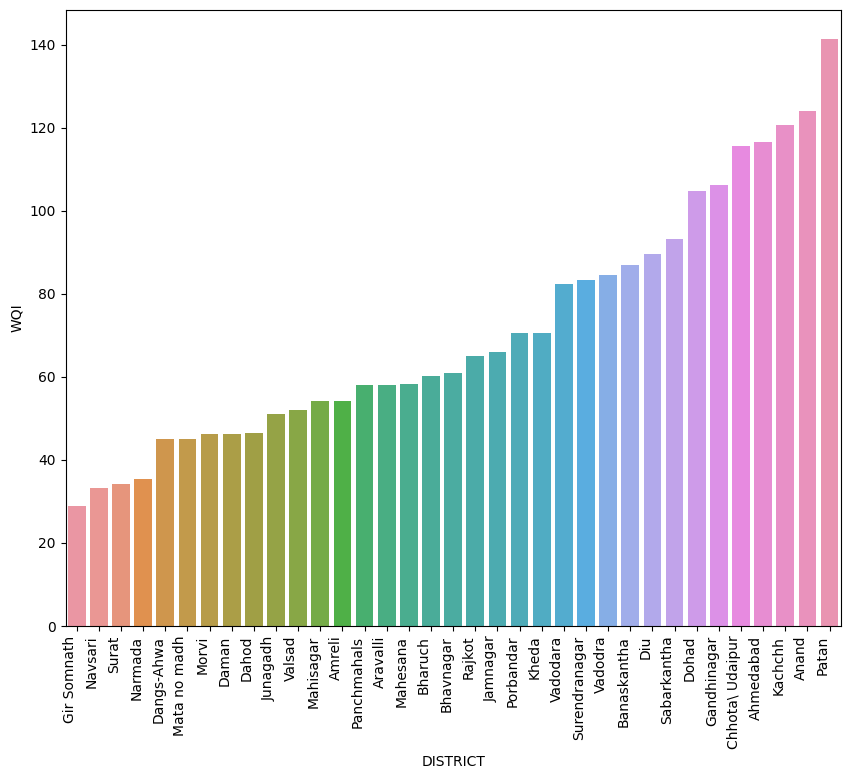

In [62]:
plt.figure(figsize=(10,8))
sns.barplot(data=ddf1, x=ddf1.index, y='WQI')
plt.xticks(rotation=90, ha='right')